## Train Deep Learning Model

### Step-1: load the preprocessing data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessing data
data = np.load("./data_preprocessing/data_preprocesiing.npz")

In [3]:
X = data['arr_0']
y = data['arr_1']

print(X.shape, y.shape)

(13942, 100, 100, 3) (13942, 4)


### Split the data into Train and Test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11153, 100, 100, 3), (2789, 100, 100, 3), (11153, 4), (2789, 4))

### Build Deep Learing Model

In [7]:
# Check GPU for trainning
import tensorflow as tf

gpu_available = tf.test.is_gpu_available()
gpu_available

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-01-10 14:14:47.512907: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-10 14:14:47.579677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:47.668957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:47.669111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

True

ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:48.586291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:48.587104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 2305 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# convolution neural network
model = Sequential([
    layers.Conv2D(16, (3, 3), padding="same", input_shape=(100, 100, 3), activation="relu"), 
    layers.MaxPool2D(), 
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"), 
    layers.MaxPool2D(), 
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"), 
    layers.MaxPool2D(), 
    layers.Flatten(), 
    layers.Dense(192, activation="relu"), 
    layers.Dropout(0.2),
    layers.Dense(28, activation="relu"), 
    layers.Dense(4, activation="softmax")
])

# Compiling CNN model
model.compile(optimizer="rmsprop", 
             loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy'])

2022-01-10 14:14:56.368789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:56.369181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:56.369401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:56.369895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 14:14:56.370225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [10]:
# Trainning CNN model
history = model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), 
          epochs=10, 
          batch_size=32)

2022-01-10 14:15:00.842799: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1338360000 exceeds 10% of free system memory.
2022-01-10 14:15:01.613433: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1338360000 exceeds 10% of free system memory.


Epoch 1/10


2022-01-10 14:15:04.197258: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-01-10 14:15:05.922543: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


349/349 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.8965

2022-01-10 14:15:10.547949: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 334680000 exceeds 10% of free system memory.
2022-01-10 14:15:11.193660: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 334680000 exceeds 10% of free system memory.


349/349 [==============================] - 10s 14ms/step - loss: 0.2686 - accuracy: 0.8965 - val_loss: 0.1285 - val_accuracy: 0.9555
Epoch 2/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0847 - accuracy: 0.9726 - val_loss: 0.0822 - val_accuracy: 0.9735
Epoch 3/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0561 - accuracy: 0.9814 - val_loss: 0.0842 - val_accuracy: 0.9767
Epoch 4/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0557 - val_accuracy: 0.9846
Epoch 5/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0547 - val_accuracy: 0.9857
Epoch 6/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.1104 - val_accuracy: 0.9828
Epoch 7/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0821 - val_accuracy: 0.9846
Epoch 8/1

In [11]:
model.save("./model_trained/FaceMaskedTrainedModel.h5")

## Hiển thị độ chính xác

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
history_df = pd.DataFrame(history.history)

In [14]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.268604,0.896530,0.128460,0.955540
1,0.084726,0.972563,0.082222,0.973467
2,0.056095,0.981350,0.084168,0.976694
3,0.042280,0.986282,0.055689,0.984582
4,0.030459,0.989958,0.054743,0.985658
5,0.025930,0.991930,0.110437,0.982790
6,0.020324,0.993186,0.082095,0.984582
7,0.018416,0.993813,0.092799,0.979563
8,0.014195,0.994979,0.065179,0.987451
9,0.012218,0.996414,0.103339,0.985299


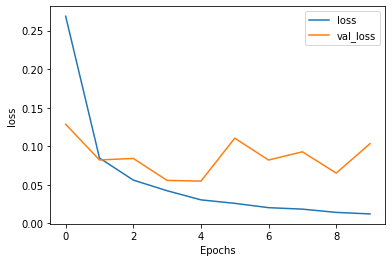

In [15]:
history_df[['loss', 'val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

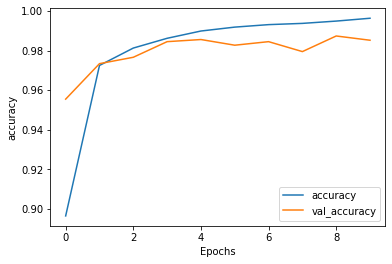

In [16]:
history_df[['accuracy', 'val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()